In [1]:
import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt

#!pip install yfinance
#!pip install --upgrade yfinance
#!pip install yahoo_fin

/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [584]:
# List of tickers for the 30 companies
# custom_tickers = [
#     "AMZN", "AXP", "AMGN", "AAPL", "BA",
#     "CAT", "CSCO", "CVX", "GS", "HD",
#     "HON", "IBM", "INTC", "JNJ", "KO",
#     "JPM", "MCD", "MMM", "MRK", "MSFT",
#     "NKE", "PG", "TRV", "UNH", "CRM",
#     "VZ", "V", "WMT", "DIS", "DJI"
# ]

#PAST DJIA
custom_tickers = [
    "PG", "JNJ", "XOM", "CVX", "MRK", "PFE", "MCD", "T",
    "VZ", "HPQ", "IBM", "MSFT", "INTC", "HD", "WMT", "TRV",
    "RTX", "BA", "AA", "DD", "CAT", "MMM", "DIS", "JPM", "AXP", "GE",
    "CCEP"
    #"CRJ", "H", "BOA","CCEP"
]


# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")

# Print the first few rows of the data for each ticker
for ticker in custom_tickers:
    if ticker in stock_data:
        print(f"Stock data for {ticker}:")
        print(stock_data[ticker].head())
        print("\n")

Stock data for PG:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.675781  1.761719  1.675781  1.703125  0.378553  1760000     PG
1970-03-26  1.703125  1.714844  1.695313  1.703125  0.378553   422400     PG
1970-03-30  1.687500  1.687500  1.660156  1.683594  0.374212   531200     PG
1970-03-31  1.683594  1.703125  1.681641  1.703125  0.378553   243200     PG
1970-04-01  1.718750  1.734375  1.718750  1.726563  0.383762   806400     PG


Stock data for JNJ:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.062500  1.100694  1.062500  1.086806  0.337554  2275200    JNJ
1970-03-26  1.086806  1.093750  1.083333  1.086806  0.337554   936000    JNJ
1970-03-30  1.086806  1.092014  1.079861  1.081597  0.335936  1368000    JNJ
1970-03-31  1.076389  1.076389  1.065972  1.072917  0.333241   676800    JNJ
1970-04-01  1.069444  1.069444  1.062500  1.065104  0.330814   820800    JNJ


Stock data for XOM:
             

In [585]:
def calculate_weekly_returns(df):
    weekly_df = df.resample('W').last()
    weekly_df['close'].fillna(method='ffill', inplace=True)
    weekly_df['returns'] = weekly_df['close'].pct_change().fillna(0)
    return weekly_df

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data = data.loc['2001-01-02':'2013-05-14']
    data.index = pd.to_datetime(data.index)
    weekly_returns = calculate_weekly_returns(data)
    weekly_returns_dict[ticker] = weekly_returns

#print(weekly_returns_dict['AMZN'])

CCEP


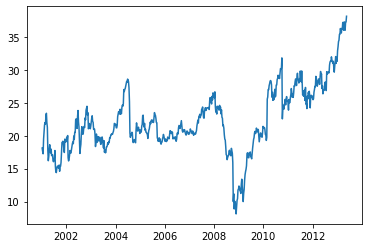

PG


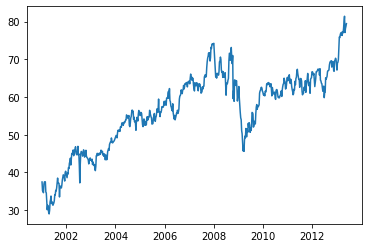

JNJ


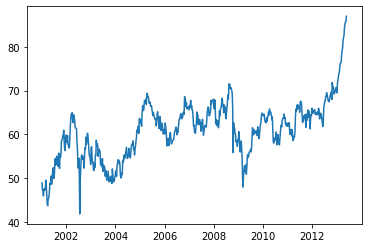

XOM


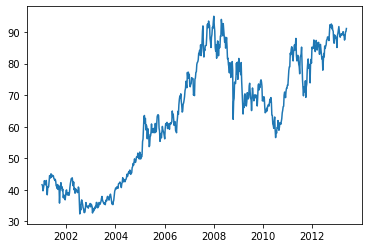

CVX


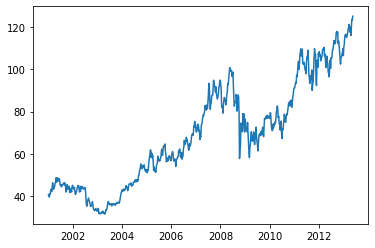

MRK


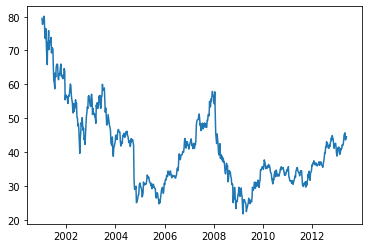

PFE


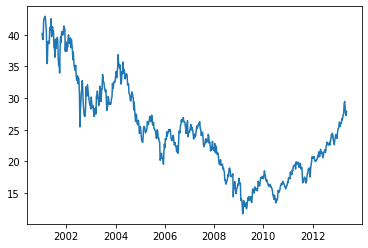

MCD


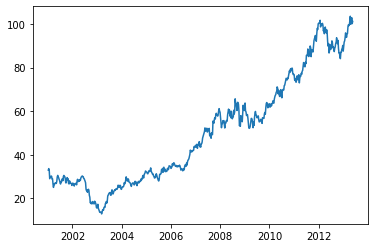

T


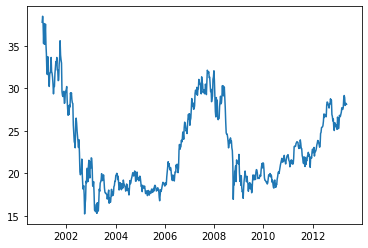

VZ


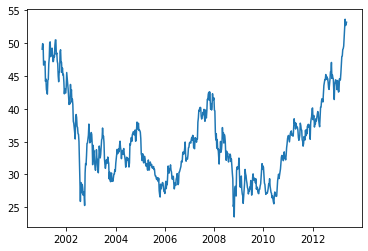

HPQ


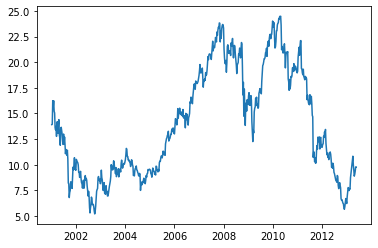

IBM


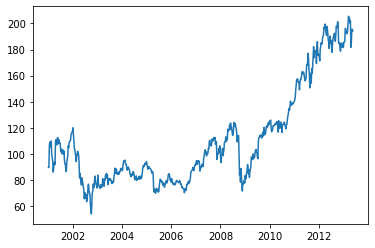

MSFT


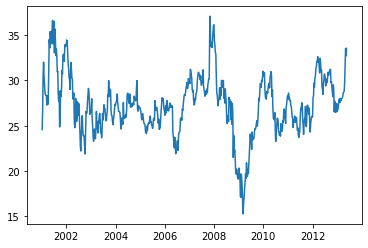

INTC


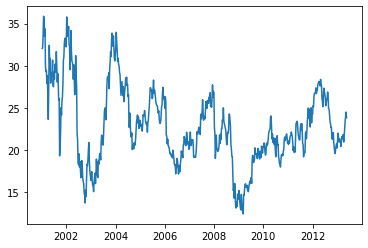

HD


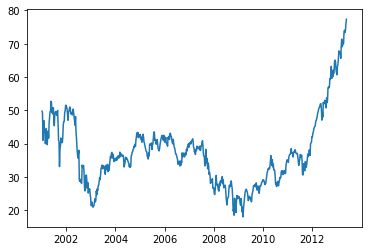

WMT


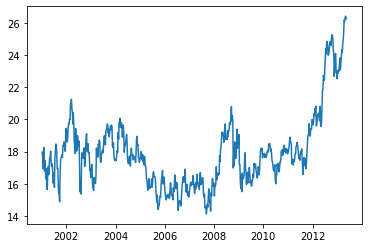

TRV


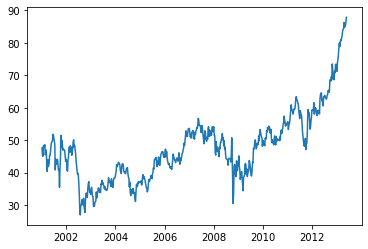

RTX


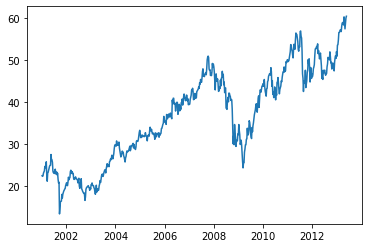

BA


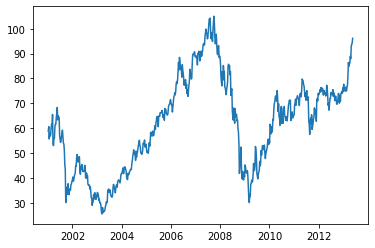

AA


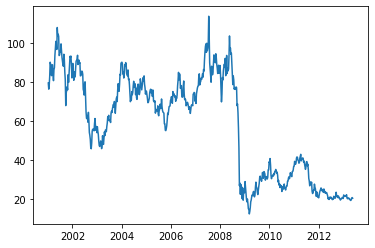

DD


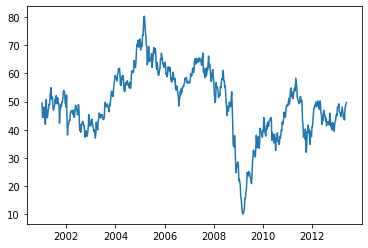

CAT


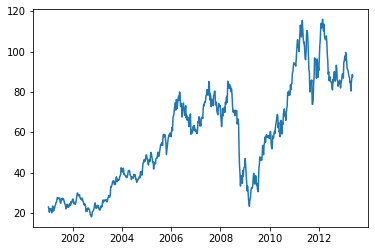

MMM


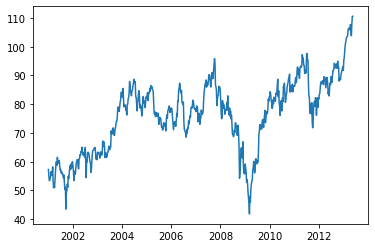

DIS


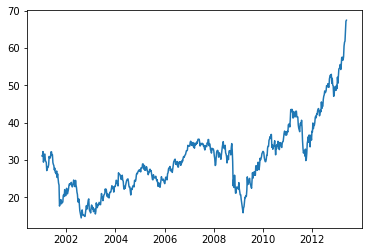

BOA


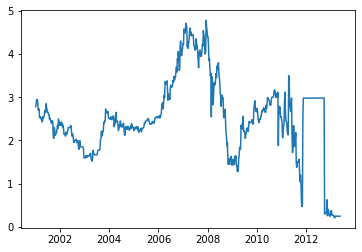

JPM


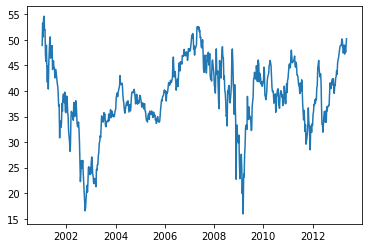

AXP


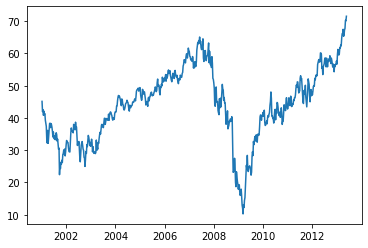

GE


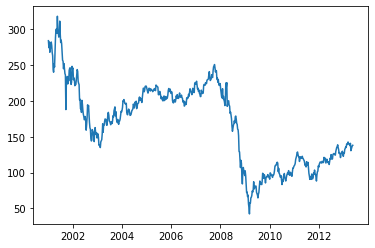

In [490]:
for i in custom_tickers:
    print(i)
    plt.plot(weekly_returns_dict[i].index,weekly_returns_dict[i]["close"])
    plt.show()

In [586]:
study_periods = [
    ('2001-01-02', '2004-01-06'),
    ('2004-01-06', '2007-01-02'),
    ('2007-01-02', '2010-01-05'),
    ('2010-01-05', '2013-05-14')
]

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data.index = pd.to_datetime(data.index)
    
    for period_num, (start_date, end_date) in enumerate(study_periods, start=1):
        period_data = data.loc[start_date:end_date]
        period_returns = calculate_weekly_returns(period_data)
        weekly_returns_dict.setdefault(ticker, {})[f'period_{period_num}'] = period_returns

In [587]:
period_dfs = {}

# Iterate over the periods
for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    # Initialize an empty dictionary to store data for the current period
    period_data = {}
    
    # Iterate over each ticker's data
    for ticker, data in weekly_returns_dict.items():
        # Drop NaN values from the 'close' column for the current period
        close_prices = data[period][['returns']].dropna()
        period_data[ticker] = close_prices
    
    # Concatenate the data for all tickers into a single DataFrame for the current period
    period_df = pd.concat(period_data, axis=1)
    period_dfs[period] = period_df.dropna(axis=1)

correlation_matrices = {}

# Iterate over the periods
for period, period_df in period_dfs.items():
    # Calculate correlation matrix for the current period and store it in the dictionary
    correlation_matrices[period] = period_df.corr()


In [7]:
#period_dfs["period_1"]

In [497]:
correlation_matrices["period_1"].dropna()

,,CCEP,PG,JNJ,XOM,CVX,MRK,PFE,MCD,T,VZ,...,RTX,BA,AA,DD,CAT,MMM,DIS,JPM,AXP,GE
,,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
CCEP,returns,1.000000,0.291965,0.275835,0.305808,0.351182,0.077079,0.187008,0.067102,0.115896,0.211407,...,0.223495,0.146301,0.244668,0.201670,0.165465,0.342498,0.223351,0.259674,0.274886,0.269781
PG,returns,0.291965,1.000000,0.550325,0.455158,0.185381,0.281896,0.474383,0.198065,0.328079,0.170136,...,0.460792,0.316151,0.254953,0.293873,0.250739,0.487590,0.245070,0.107283,0.371976,0.414502
JNJ,returns,0.275835,0.550325,1.000000,0.530433,0.310492,0.500458,0.564459,0.145470,0.275274,0.205238,...,0.323859,0.142561,0.195929,0.282010,0.345529,0.466366,0.220956,0.147199,0.334189,0.415148
XOM,returns,0.305808,0.455158,0.530433,1.000000,0.724338,0.455461,0.532764,0.222550,0.286984,0.277284,...,0.570832,0.447948,0.483874,0.476984,0.529997,0.626147,0.376198,0.434206,0.561895,0.578695
CVX,returns,0.351182,0.185381,0.310492,0.724338,1.000000,0.382869,0.427996,0.287370,0.153772,0.245229,...,0.436089,0.367572,0.459269,0.367951,0.495083,0.458580,0.323705,0.501737,0.495385,0.450503
MRK,returns,0.077079,0.281896,0.500458,0.455461,0.382869,1.000000,0.641275,0.304955,0.334139,0.263051,...,0.328586,0.278270,0.366592,0.326738,0.417517,0.348766,0.277947,0.364838,0.394472,0.329828
PFE,returns,0.187008,0.474383,0.564459,0.532764,0.427996,0.641275,1.000000,0.251693,0.339940,0.242922,...,0.465726,0.333441,0.413708,0.365976,0.414117,0.544934,0.299845,0.355356,0.407330,0.424483
MCD,returns,0.067102,0.198065,0.145470,0.222550,0.287370,0.304955,0.251693,1.000000,0.229455,0.217104,...,0.266020,0.320825,0.372278,0.181255,0.285888,0.261804,0.491130,0.378740,0.343390,0.288607
T,returns,0.115896,0.328079,0.275274,0.286984,0.153772,0.334139,0.339940,0.229455,1.000000,0.598138,...,0.226622,0.195075,0.305000,0.249814,0.228079,0.261872,0.261381,0.267451,0.345128,0.431414


<ipython-input-588-f2f2877dcc6b>:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward') #'ward'
/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:446: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


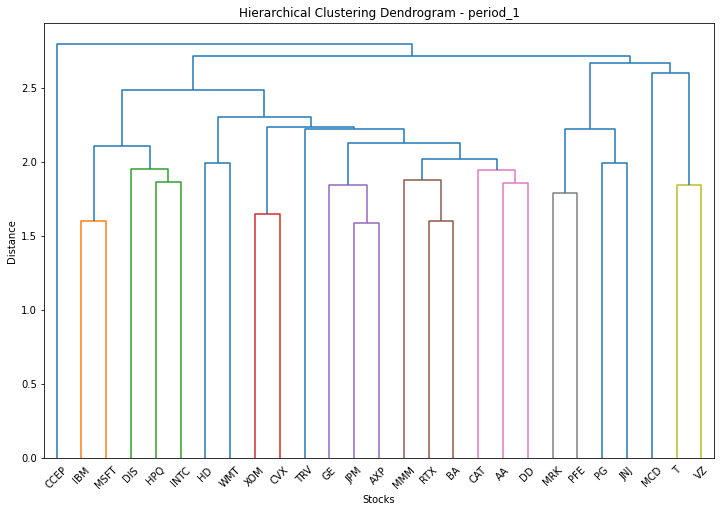

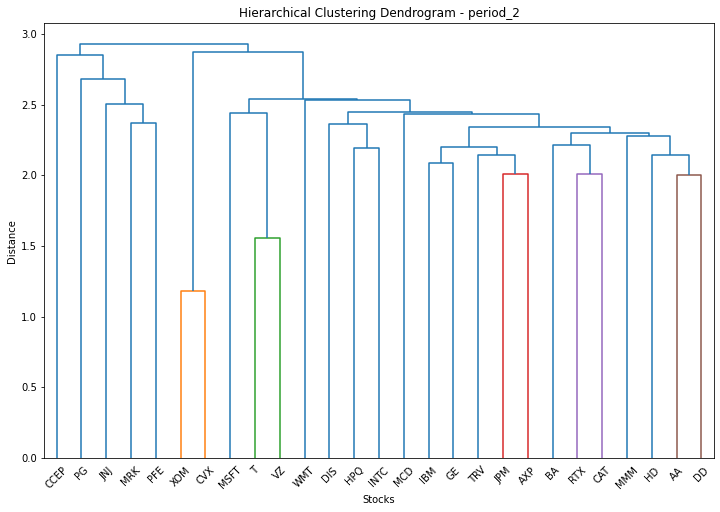

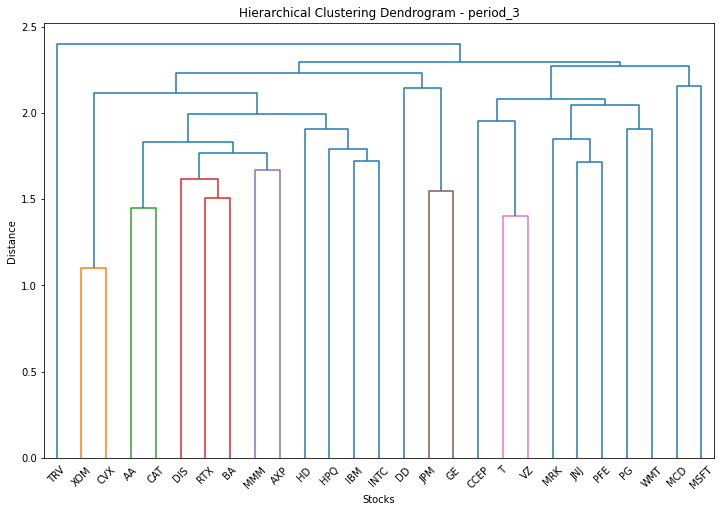

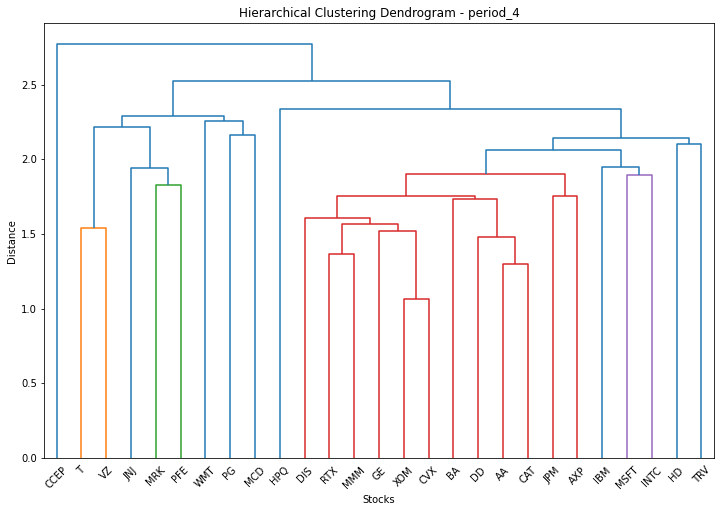

In [588]:
import numpy as np
from scipy.cluster.hierarchy import average, fcluster, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def ultrametric(correlation_matrix, q=2):
    """
    Convert a correlation matrix to an ultrametric distance matrix.

    Parameters:
        correlation_matrix (pd.DataFrame): Correlation matrix of stocks.
        q (float): Exponent parameter (default is 2).

    Returns:
        pd.DataFrame: Ultrametric distance matrix.
    """
    # Calculate the ultrametric distance matrix
    ultrametric_distances = q * (1 - correlation_matrix) ** (1/q)
    
    return ultrametric_distances

# Function to perform hierarchical clustering and print stocks in each cluster
def hierarchical_clustering(distance_matrix, labels, period):
#    linkage_matrix = average(distance_matrix)
    linkage_matrix = linkage(distance_matrix, method='ward') #'ward'
    labels = [label[0] for label in labels]

    # Set the figure size to be larger
    plt.figure(figsize=(12, 8))  # Adjust the size as needed

    # Plot the dendrogram
    dendrogram(average(distance_matrix), labels=labels, orientation='top')

    # Customize plot title and axis labels
    plt.title(f'Hierarchical Clustering Dendrogram - {period}')
    plt.xlabel('Stocks')
    plt.ylabel('Distance')

    # Create dictionary to store stocks in each cluster for 2, 4, and 8 clusters
    cluster_stocks = {num_clusters: {} for num_clusters in [2, 4, 8]}
    
    # Perform clustering to get cluster labels for 2, 4, and 8 clusters
    for num_clusters in [2, 4, 8]:
        cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        
        # Assign stocks to clusters
        for stock, cluster_label in zip(labels, cluster_labels):
            if cluster_label not in cluster_stocks[num_clusters]:
                cluster_stocks[num_clusters][cluster_label] = [stock]
            else:
                cluster_stocks[num_clusters][cluster_label].append(stock)

    # Show the plot
    plt.show()
    
    return cluster_stocks

# Convert new correlation matrices to distance matrices using ultrametric function
distance_matrices = {}
for period, correlation_matrix in correlation_matrices.items():
    distance_matrices[period] = ultrametric(correlation_matrix)

# Create a dictionary to store cluster stocks for each period
all_cluster_stocks = {}

# Perform hierarchical clustering and plot dendrogram for each study period
for period, distance_matrix in distance_matrices.items():
    all_cluster_stocks[period] = hierarchical_clustering(distance_matrix.values, distance_matrix.index, period)


In [592]:
all_cluster_stocks["period_1"][4]

{1: ['PG', 'JNJ', 'MRK', 'PFE'],
 4: ['XOM',
  'CVX',
  'HD',
  'WMT',
  'TRV',
  'RTX',
  'BA',
  'AA',
  'DD',
  'CAT',
  'MMM',
  'JPM',
  'AXP',
  'GE'],
 2: ['MCD', 'T', 'VZ', 'CCEP'],
 3: ['HPQ', 'IBM', 'MSFT', 'INTC', 'DIS']}

In [ ]:
# RETURN CALCULATIONS

In [593]:
def calculate_metrics_for_random_selection(period_dfs, num_stocks_list):
    results_by_period = {}
    num_portfolios = 100
 
    for period, returns_data in period_dfs.items():
        returns_data = returns_data.droplevel(1, axis=1)
        #print(returns_data)
        results_by_stocks = {}
        stocks_length_list = {}
        #print(returns_data)
        
        for num_stocks in num_stocks_list:
            std_returns = []
            portfolio_returns = []
            correlation = []
            selected_stocks_list = {}
            
            for _ in range(num_portfolios):
                selected_stocks = np.random.choice(returns_data.columns, size=num_stocks, replace=False)
                
                try:
                    selected_stocks_list[num_stocks] = np.concatenate([selected_stocks_list[num_stocks], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_stocks] = selected_stocks
               
                
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                
                
                mean_std = (portfolio_return_stocks).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlation = mean_correlation
            
            #stocks_length_list[period] = selected_stocks_list
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            
            results_by_stocks[num_stocks] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': mean_correlation, "Stocks" : final_stocks_list}

        results_by_period[period] = results_by_stocks
    
    return results_by_period

results_by_period = calculate_metrics_for_random_selection(period_dfs, num_stocks_list)

dfs = []
for period, results_by_stocks in results_by_period.items():
    for num_stocks, metrics in results_by_stocks.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_stocks} stocks)"])
        dfs.append(df)

result_df_random = pd.concat(dfs)
result_df_random

,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),0.002998,0.037305,0.017351,0.564459,"[MMM, XOM, VZ, CCEP, CVX, DIS, MCD, XOM, JNJ, ..."
period_1 (4 stocks),0.025420,0.033327,0.081306,0.519430,"[HPQ, PFE, CAT, VZ, CAT, T, GE, CCEP, INTC, IB..."
period_1 (8 stocks),0.019938,0.030605,0.067131,0.373259,"[MRK, BA, XOM, DIS, MCD, GE, CAT, PG, PFE, DD,..."
period_2 (2 stocks),0.259396,0.021315,1.263244,0.040622,"[JNJ, WMT, TRV, AXP, WMT, MCD, CAT, GE, BA, IN..."
period_2 (4 stocks),0.245604,0.018527,1.344006,0.386564,"[WMT, CCEP, RTX, HD, TRV, CVX, CAT, PFE, GE, M..."
period_2 (8 stocks),0.262600,0.016223,1.639101,0.155735,"[CAT, BA, CCEP, GE, JNJ, MRK, PFE, DD, MSFT, H..."
period_3 (2 stocks),0.003168,0.043155,0.033560,0.587789,"[MSFT, VZ, MRK, DD, VZ, INTC, MSFT, BA, VZ, PG..."
period_3 (4 stocks),-0.001425,0.039965,0.022601,0.453658,"[MMM, JNJ, CCEP, XOM, MRK, DIS, INTC, GE, HPQ,..."
period_3 (8 stocks),0.005557,0.038257,0.024396,0.500604,"[PFE, JPM, TRV, DIS, PG, MMM, HD, CVX, PFE, JN..."
period_4 (2 stocks),0.445898,0.028297,1.753529,0.635116,"[T, MRK, VZ, XOM, MRK, AXP, AA, CCEP, RTX, TRV..."


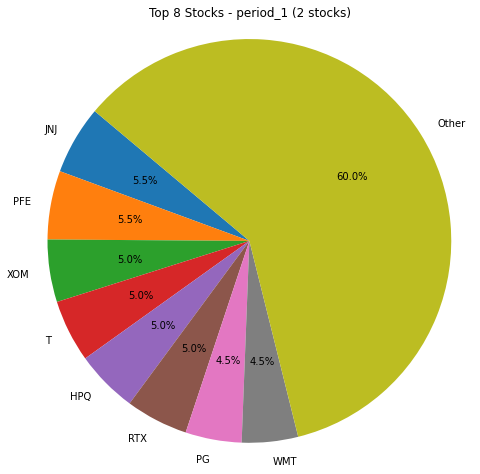

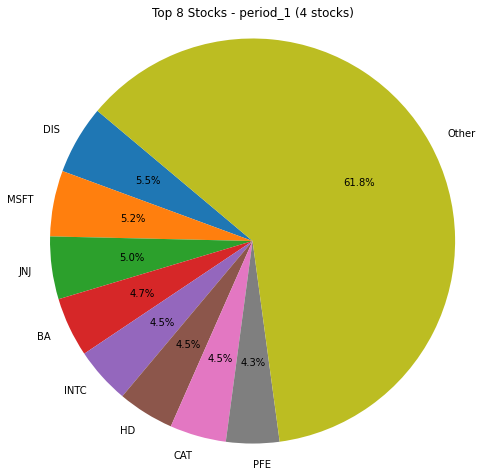

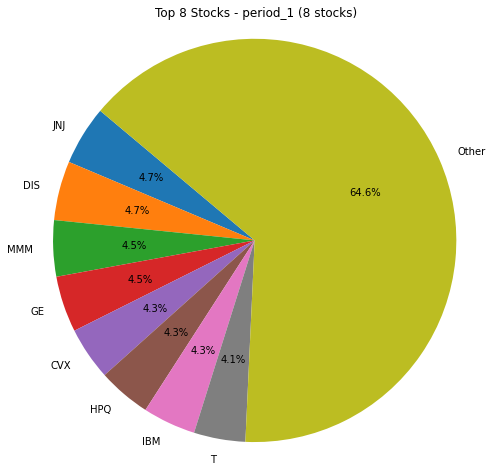

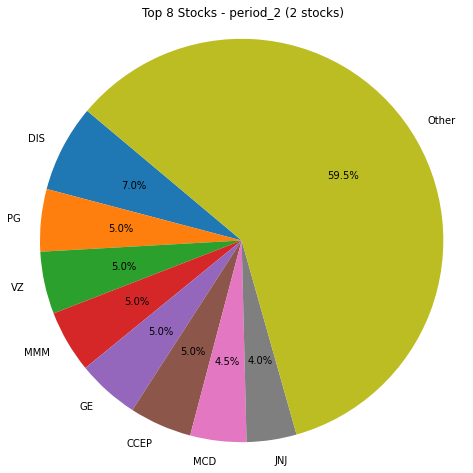

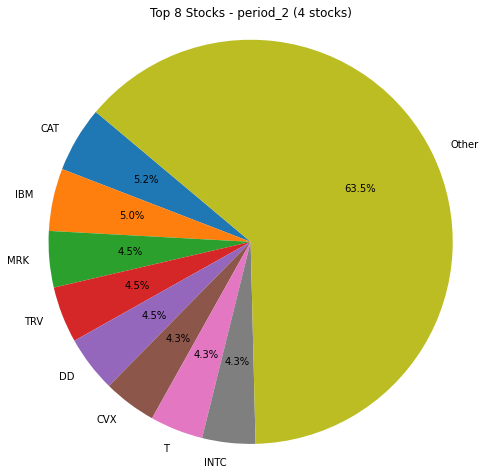

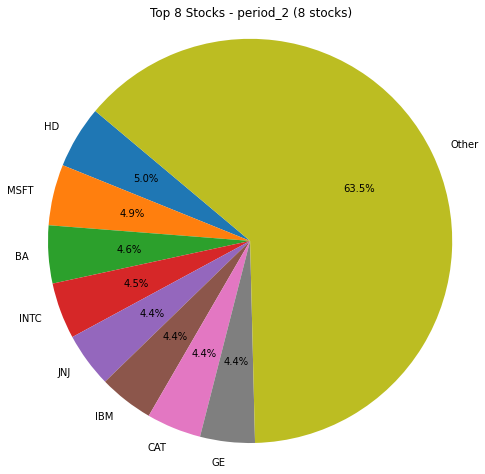

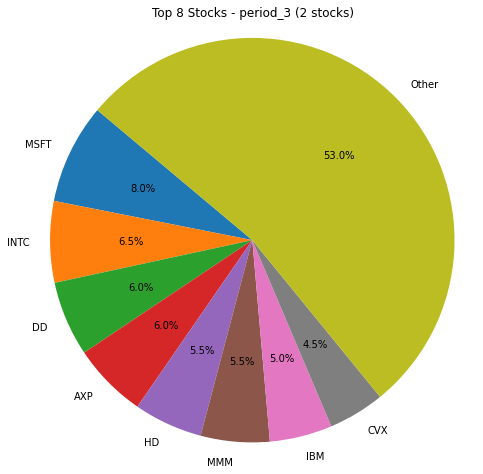

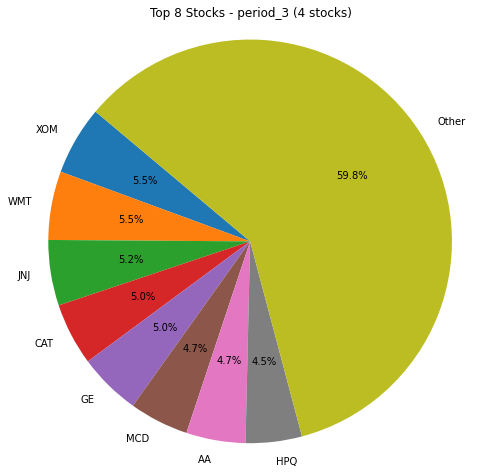

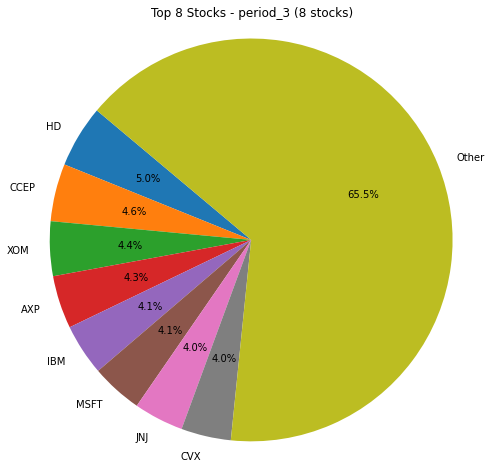

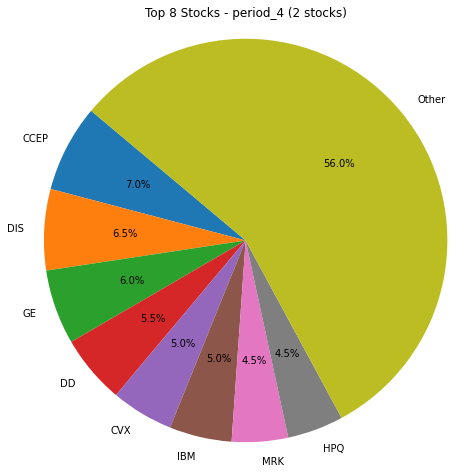

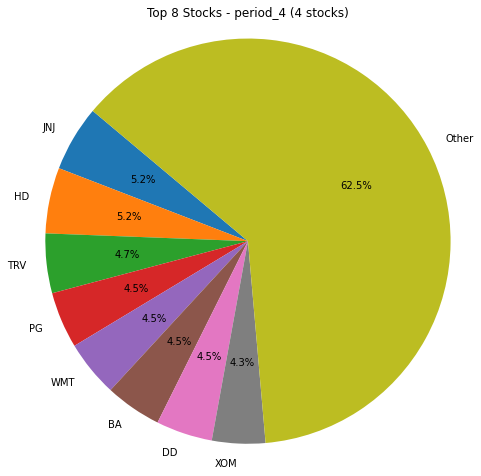

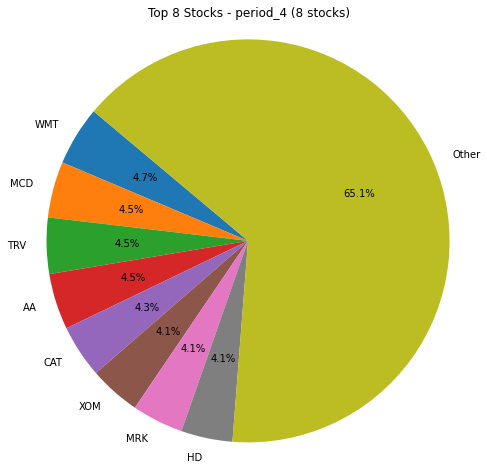

In [594]:
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers, columns=[period])

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers
    total_counts = counts_df.sum(axis=1)

    # Get the top 8 stocks and group the rest into "Other"
    top_8 = total_counts.nlargest(8)
    other = pd.Series(total_counts.sum() - top_8.sum(), index=["Other"])

    # Concatenate the top 8 and "Other"
    final_counts = pd.concat([top_8, other])

    # Plot the pie chart for the current period
    plt.figure(figsize=(8, 8))
    plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 8 Stocks - {period}')
    plt.show()

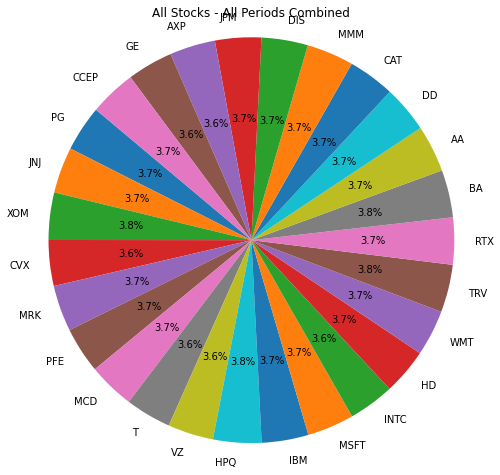

In [553]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Plot the pie chart for all periods combined
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('All Stocks - All Periods Combined')
plt.show()

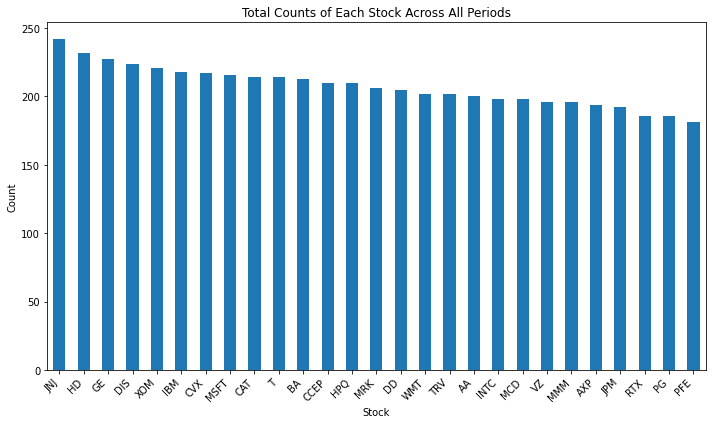

In [595]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Sort the total counts in descending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Plot the bar chart for all periods combined
plt.figure(figsize=(10, 6))
total_counts_sorted.plot(kind='bar')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.title('Total Counts of Each Stock Across All Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [596]:
#CLUSTERS

import pandas as pd
import numpy as np

def calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs):
    results_by_period = {}
    num_portfolios = 100
    
    for period, cluster_stocks in all_cluster_stocks.items():
        returns_data = period_dfs[period].droplevel(1, axis=1)
        results_by_cluster = {}
        selected_stocks_list = {}
        #print(returns_data)
        
        for num_clusters, clusters in cluster_stocks.items():
            cluster_lists = list(clusters.values())
            std_returns = []
            portfolio_returns = []
            #print(cluster_lists)
            correlation = 0
            
            for _ in range(num_portfolios):
                # First, choose stocks from each cluster
                selected_stocks = [np.random.choice(cluster_list, size=1)[0] for cluster_list in cluster_lists]
                
                try:
                    selected_stocks_list[num_stocks] = np.concatenate([selected_stocks_list[num_stocks], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_stocks] = selected_stocks
                
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                
                
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                
                #print(returns_data[selected_stocks].std())
                mean_std = (portfolio_return_stocks+1).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlation = mean_correlation
            plt.show()
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            
            results_by_cluster[num_clusters] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': mean_correlation, "Stocks" : final_stocks_list}
            #print()
        results_by_period[period] = results_by_cluster
    
    return results_by_period

#results_by_period = calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs)
#results_by_period


results_by_period = calculate_metrics_for_all_clusters(all_cluster_stocks, period_dfs)

dfs = []
for period, results_by_cluster in results_by_period.items():
    for num_clusters, metrics in results_by_cluster.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_clusters} stocks)"])
        dfs.append(df)

result_df_clusters = pd.concat(dfs)
result_df_clusters

,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),-0.033584,0.035708,-0.070359,0.365976,"[JNJ, MMM, VZ, AA, JNJ, RTX, T, HPQ, PFE, TRV,..."
period_1 (4 stocks),0.013286,0.031042,0.054613,0.348906,"[JNJ, MMM, VZ, AA, JNJ, RTX, T, HPQ, PFE, TRV,..."
period_1 (8 stocks),-0.001558,0.028036,-0.000594,0.298901,"[JNJ, MMM, VZ, AA, JNJ, RTX, T, HPQ, PFE, TRV,..."
period_2 (2 stocks),0.265965,0.021011,1.370720,0.378254,"[JNJ, WMT, JNJ, AXP, XOM, JPM, XOM, T, CVX, GE..."
period_2 (4 stocks),0.336254,0.016416,2.093223,0.203759,"[JNJ, WMT, JNJ, AXP, XOM, JPM, XOM, T, CVX, GE..."
period_2 (8 stocks),0.244957,0.013754,1.799267,0.168430,"[JNJ, WMT, JNJ, AXP, XOM, JPM, XOM, T, CVX, GE..."
period_3 (2 stocks),-0.013246,0.039950,-0.000620,0.442604,"[JNJ, MSFT, MRK, MSFT, WMT, MSFT, MCD, RTX, PF..."
period_3 (4 stocks),-0.016250,0.042092,-0.039552,0.372059,"[JNJ, MSFT, MRK, MSFT, WMT, MSFT, MCD, RTX, PF..."
period_3 (8 stocks),0.003393,0.034664,0.007015,0.470503,"[JNJ, MSFT, MRK, MSFT, WMT, MSFT, MCD, RTX, PF..."
period_4 (2 stocks),0.464312,0.025610,1.900764,0.491084,"[CCEP, AA, CCEP, IBM, VZ, DIS, T, CVX, TRV, GE..."


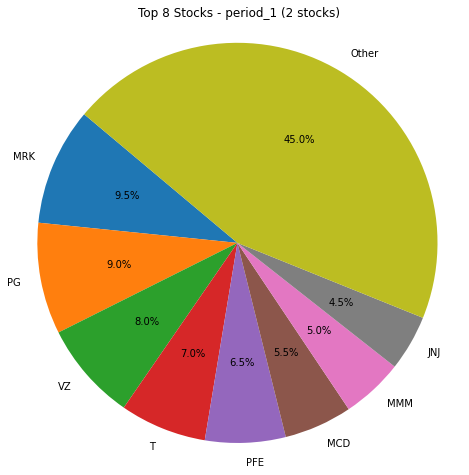

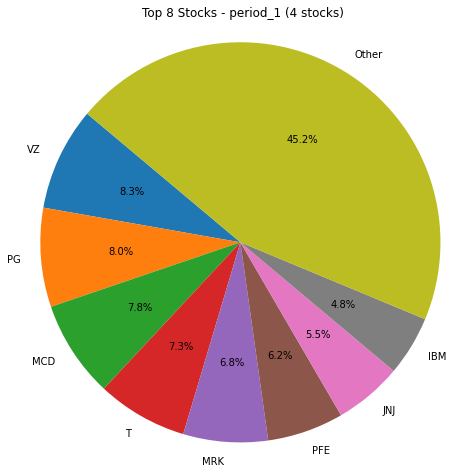

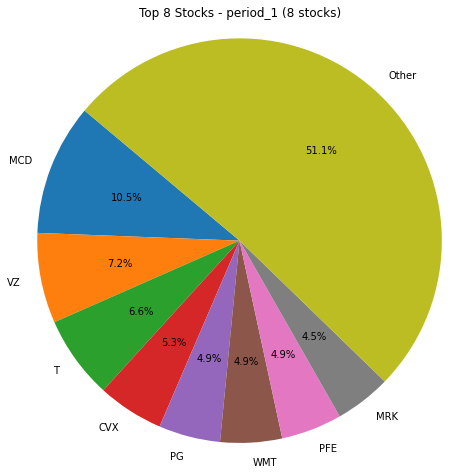

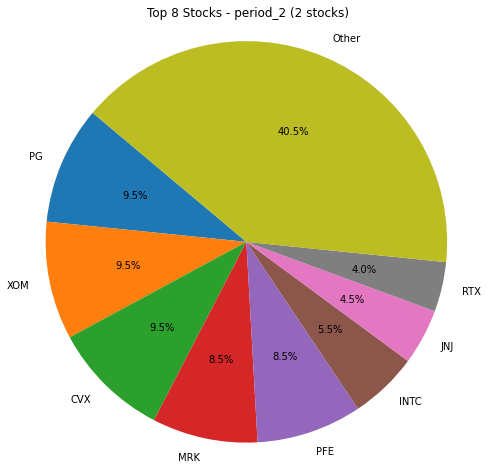

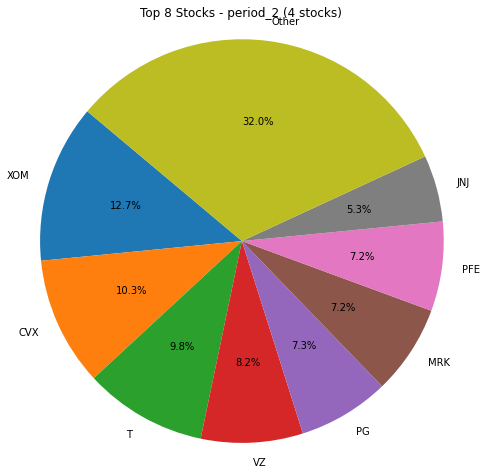

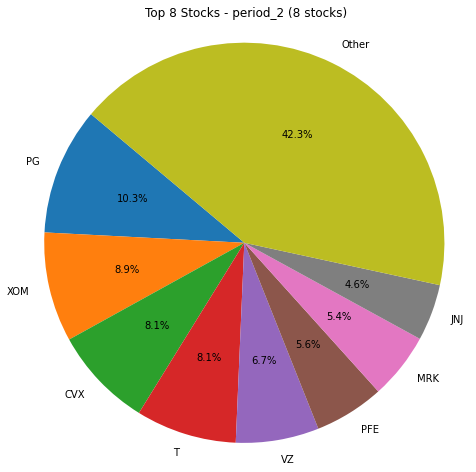

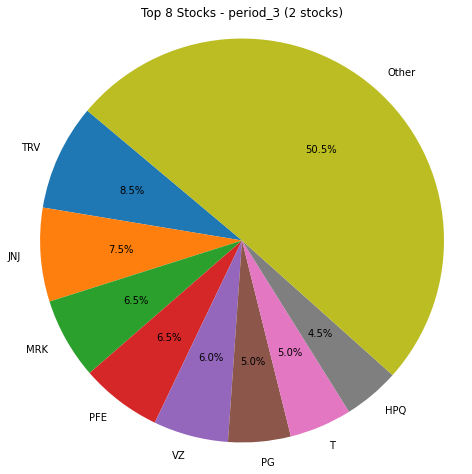

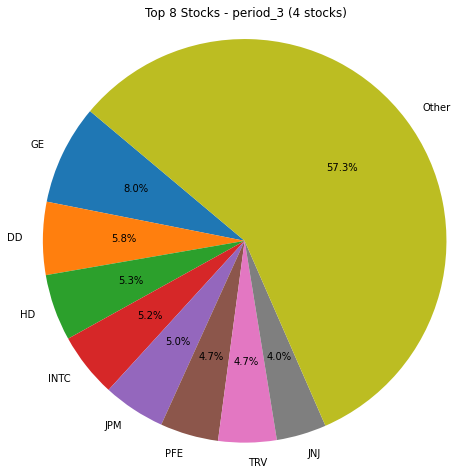

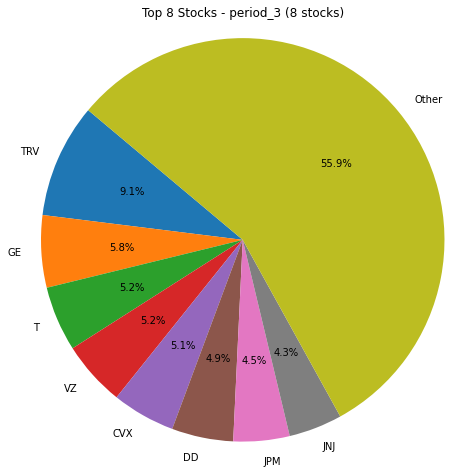

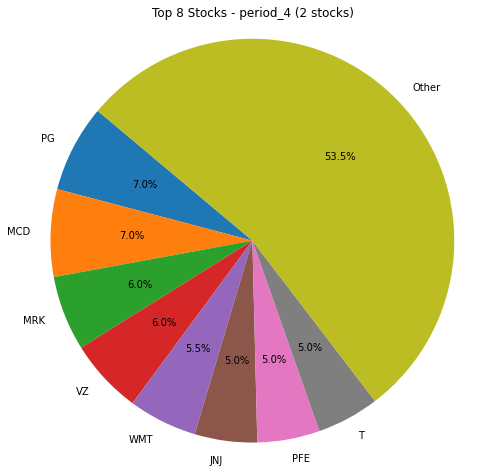

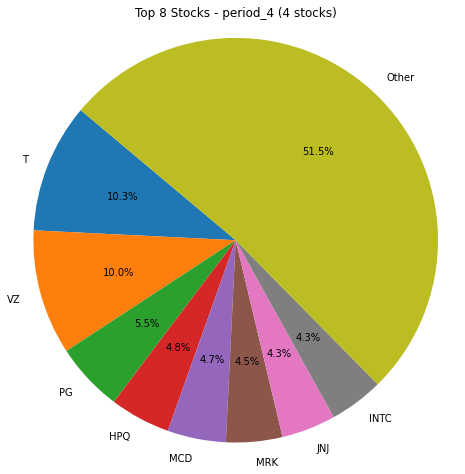

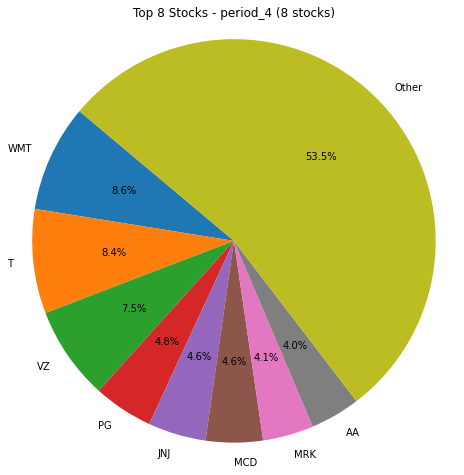

In [517]:
for period, group in result_df_clusters.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers, columns=[period])

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers
    total_counts = counts_df.sum(axis=1)

    # Get the top 8 stocks and group the rest into "Other"
    top_8 = total_counts.nlargest(8)
    other = pd.Series(total_counts.sum() - top_8.sum(), index=["Other"])

    # Concatenate the top 8 and "Other"
    final_counts = pd.concat([top_8, other])

    # Plot the pie chart for the current period
    plt.figure(figsize=(8, 8))
    plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 8 Stocks - {period}')
    plt.show()

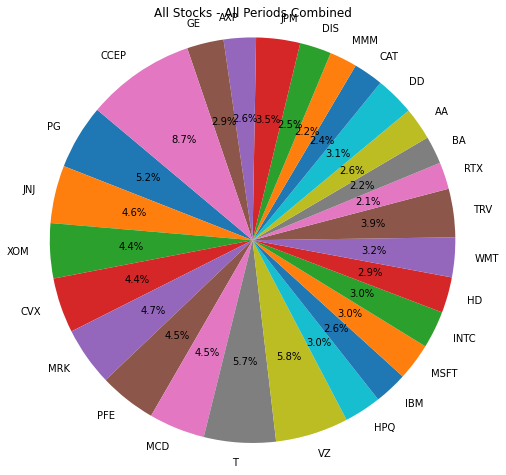

In [556]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_clusters.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Plot the pie chart for all periods combined
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('All Stocks - All Periods Combined')
plt.show()

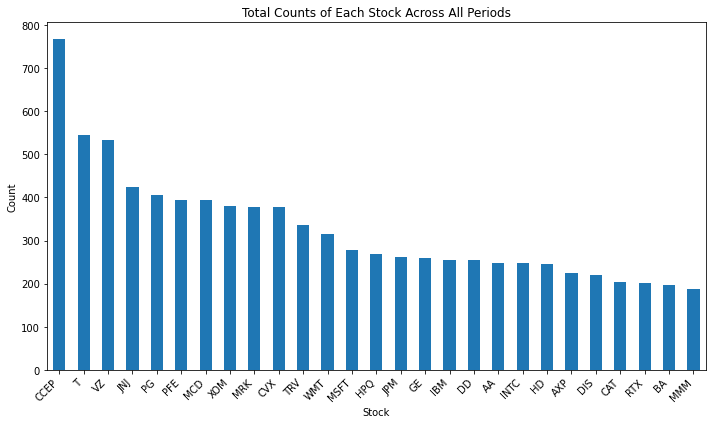

In [597]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_clusters.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Sort the total counts in descending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Plot the bar chart for all periods combined
plt.figure(figsize=(10, 6))
total_counts_sorted.plot(kind='bar')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.title('Total Counts of Each Stock Across All Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

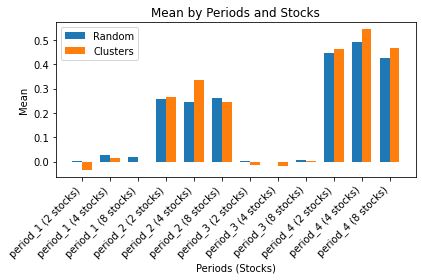

Total Average Mean of Random Values: 0.18221458496959597
Total Average Mean of Cluster Values: 0.18958846315794467

Period 1 Average Mean of Random Values: 0.016118685352582606
Period 1 Average Mean of Cluster Values: -0.007285438462836371
Period 2 Average Mean of Random Values: 0.25586652417211403
Period 2 Average Mean of Cluster Values: 0.28239180826523347
Period 3 Average Mean of Random Values: 0.0024335559695399136
Period 3 Average Mean of Cluster Values: -0.008700710277302032


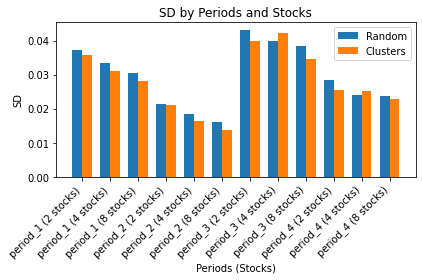

Total Average SD of Random Values: 0.029555082068785293
Total Average SD of Cluster Values: 0.028042218105322148

Period 1 Average SD of Random Values: 0.03374552536836855
Period 1 Average SD of Cluster Values: 0.03159509055545681
Period 2 Average SD of Random Values: 0.018688165905630424
Period 2 Average SD of Cluster Values: 0.017060548499900043
Period 3 Average SD of Random Values: 0.04045897891647725
Period 3 Average SD of Cluster Values: 0.03890210519773832


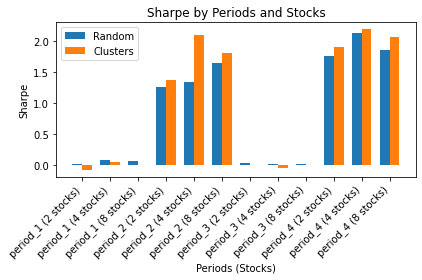

Total Average Sharpe of Random Values: 0.8516981631826542
Total Average Sharpe of Cluster Values: 0.9468165000202227

Period 1 Average Sharpe of Random Values: 0.05526290478417118
Period 1 Average Sharpe of Cluster Values: -0.005446463241389491
Period 2 Average Sharpe of Random Values: 1.415450137832857
Period 2 Average Sharpe of Cluster Values: 1.754403631457315
Period 3 Average Sharpe of Random Values: 0.026852159743873043
Period 3 Average Sharpe of Cluster Values: -0.011052208736247382


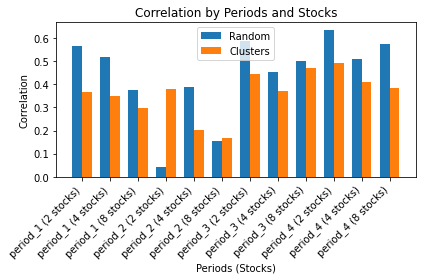

Total Average Correlation of Random Values: 0.44158230866630466
Total Average Correlation of Cluster Values: 0.3608641312820831

Period 1 Average Correlation of Random Values: 0.48571596324213573
Period 1 Average Correlation of Cluster Values: 0.3379278717596546
Period 2 Average Correlation of Random Values: 0.19430688877673208
Period 2 Average Correlation of Cluster Values: 0.250147936030247
Period 3 Average Correlation of Random Values: 0.5140169418346526
Period 3 Average Correlation of Cluster Values: 0.42838852316324694


In [598]:
def plot_metric(metric_name):
    labels = list(result_df_random.index)
    
    random_values = [result_df_random.loc[label][metric_name] for label in labels]
    cluster_values = [result_df_clusters.loc[label][metric_name] for label in labels]

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, random_values, width, label='Random')
    rects2 = ax.bar([i + width for i in x], cluster_values, width, label='Clusters')

    ax.set_xlabel('Periods (Stocks)')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} by Periods and Stocks')
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

    #print(random_values)
    #print(cluster_values)
    
    print("Total Average " + metric_name + " of Random Values:", np.mean(random_values))
    print("Total Average " + metric_name + " of Cluster Values:", np.mean(cluster_values))
    print()
    periods = ["Period 1", "Period 2", "Period 3"]  # Update with your periods
    for period_num, period_label in enumerate(periods, start=1):
        print(period_label + " Average " + metric_name + " of Random Values:", np.mean(random_values[(period_num - 1) * 3:period_num * 3]))
        print(period_label + " Average " + metric_name + " of Cluster Values:", np.mean(cluster_values[(period_num - 1) * 3:period_num * 3]))

# Plotting Mean
plot_metric('Mean')

# Plotting SD
plot_metric('SD')

# Plotting Sharpe
plot_metric('Sharpe')

# Plotting Correlation
plot_metric('Correlation')